In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline
df = pd.read_csv('credit_card_dataset.csv')


In [2]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5008865      F         Y             Y         2       135000.0   
2  5008889      F         N             Y         0       247500.0   
3  5009000      M         Y             Y         0       157500.0   
4  5009023      F         N             Y         2       216000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1               Working  Secondary / secondary special        Married   
2  Commercial associate               Higher education      Separated   
3               Working  Secondary / secondary special        Married   
4         State servant               Higher education        Married   

        Housing_type  Birthday_count  Employed_days Type_Occupation  \
0  House / apartment        -18772.0         365243

In [5]:
# correct property name
df.rename(columns={'Propert_Owner': 'Property_Owner'}, inplace=True)

In [7]:

print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Family_Members     Rejected  
count    1548.000000     1548.000000  1548.000000  
mean    59364.689922        2.161499     0.113049  
std    137808.062701        0.947772     0.316755  
min    -14887.000000        1.000000     0.000000  
25%     -3174.500000        2.000000     0.000000  
50%     -1565.000000        2.000000     0.000000  
75%      -

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  Rejected         1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [11]:
# Convert all column names to title case (first letter capitalized)
df.columns = df.columns.str.strip().str.title()
# Verify the updated column names
print("Updated column names:", df.columns)

Updated column names: Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Type_Occupation',
       'Family_Members', 'Rejected'],
      dtype='object')


In [13]:
print(df.isnull().sum())

Ind_Id               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Type_Occupation    488
Family_Members       0
Rejected             0
dtype: int64


In [15]:
#  Convert empty strings to NaN for columns with empty values
df.replace("", pd.NA, inplace=True)

# Convert empty strings to NaN in the 'Gender' column
df['Gender'] = df['Gender'].replace("", pd.NA)

# Fill missing 'Gender' with the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Fill missing 'Annual Income' with the median value
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

# Fill missing 'Birthday_count' with the median value of 'Birthday_count'
df['Birthday_Count'] = df['Birthday_Count'].fillna(df['Birthday_Count'].median())

# Fill missing 'Occupation Type' with mode
df['Type_Occupation'] = df['Type_Occupation'].fillna(df['Type_Occupation'].mode()[0])

print(" Null values after imputation")
# Check for any remaining missing values
print(df.isnull().sum())

# Save the updated DataFrame to a new CSV file
df.to_csv('credit_card_dataset.csv', index=False)

 Null values after imputation
Ind_Id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Type_Occupation    0
Family_Members     0
Rejected           0
dtype: int64


In [17]:

# Ensure 'Birthday_Count' and 'Employed_Days' are numeric
df['Birthday_Count'] = pd.to_numeric(df['Birthday_Count'], errors='coerce')
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

# Fill missing values with the median for 'Birthday_Count' and 0 for 'Employed_Days'
df['Birthday_Count'] = df['Birthday_Count'].fillna(df['Birthday_Count'].median())
df['Employed_Days'] = df['Employed_Days'].fillna(0)

# Calculate 'Age' from 'Birthday_Count' (convert backward days to age in years)
df['Age'] = (df['Birthday_Count'] / -365).astype(int)  # Convert days to years

# Calculate 'Employment(years)' from 'Employed_Days' (convert backward days to employment duration in years)
# Use absolute value to ensure positive duration if the person is employed
df['Employment(years)'] = df['Employed_Days'].apply(lambda x: abs(x) / 365 if x < 0 else 0).round(2)

# Drop 'Birthday_Count' and 'Employed_Days' columns
df.drop(['Birthday_Count', 'Employed_Days'], axis=1, inplace=True)

# Reorder columns to ensure 'Reject' is the last column
columns = [col for col in df.columns if col != 'Rejected'] + ['Rejected']
df = df[columns]

# Display the first 10 rows of the updated DataFrame
print(df.head(10))


# Save the updated DataFrame to a new CSV file
df.to_csv('credit_card_dataset.csv', index=False)

    Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5008865      F         Y              Y         2       135000.0   
2  5008889      F         N              Y         0       247500.0   
3  5009000      M         Y              Y         0       157500.0   
4  5009023      F         N              Y         2       216000.0   
5  5009053      F         N              Y         2       202500.0   
6  5009074      F         Y              Y         1       450000.0   
7  5009118      F         N              N         0       157500.0   
8  5009146      M         Y              N         0       315000.0   
9  5009195      F         N              N         0       292500.0   

            Type_Income                      Education Marital_Status  \
0             Pensioner               Higher education        Married   
1               Working  Secondary / secondary special        Married   

Rejected
0    1373
1     175
Name: count, dtype: int64


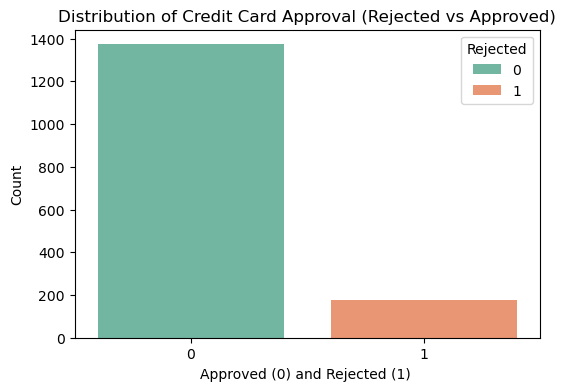

In [19]:
print(df['Rejected'].value_counts())  # Check class distribution
# Plot the target variable's distribution( Rejected )
plt.figure(figsize=(6, 4))
sns.countplot(x='Rejected', data=df, palette="Set2", hue="Rejected")
plt.title("Distribution of Credit Card Approval (Rejected vs Approved)")
plt.xlabel("Approved (0) and Rejected (1) ")
plt.ylabel("Count")
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "rejected_distribution.png")
plt.savefig(desktop_path)
plt.show()


In [21]:
numerical_features = ['Children', 'Annual_Income', 'Age', 'Employment(years)', 'Family_Members']
categorical_cols = ['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Education', 
                    'Marital_Status', 'Housing_Type', 'Type_Occupation']


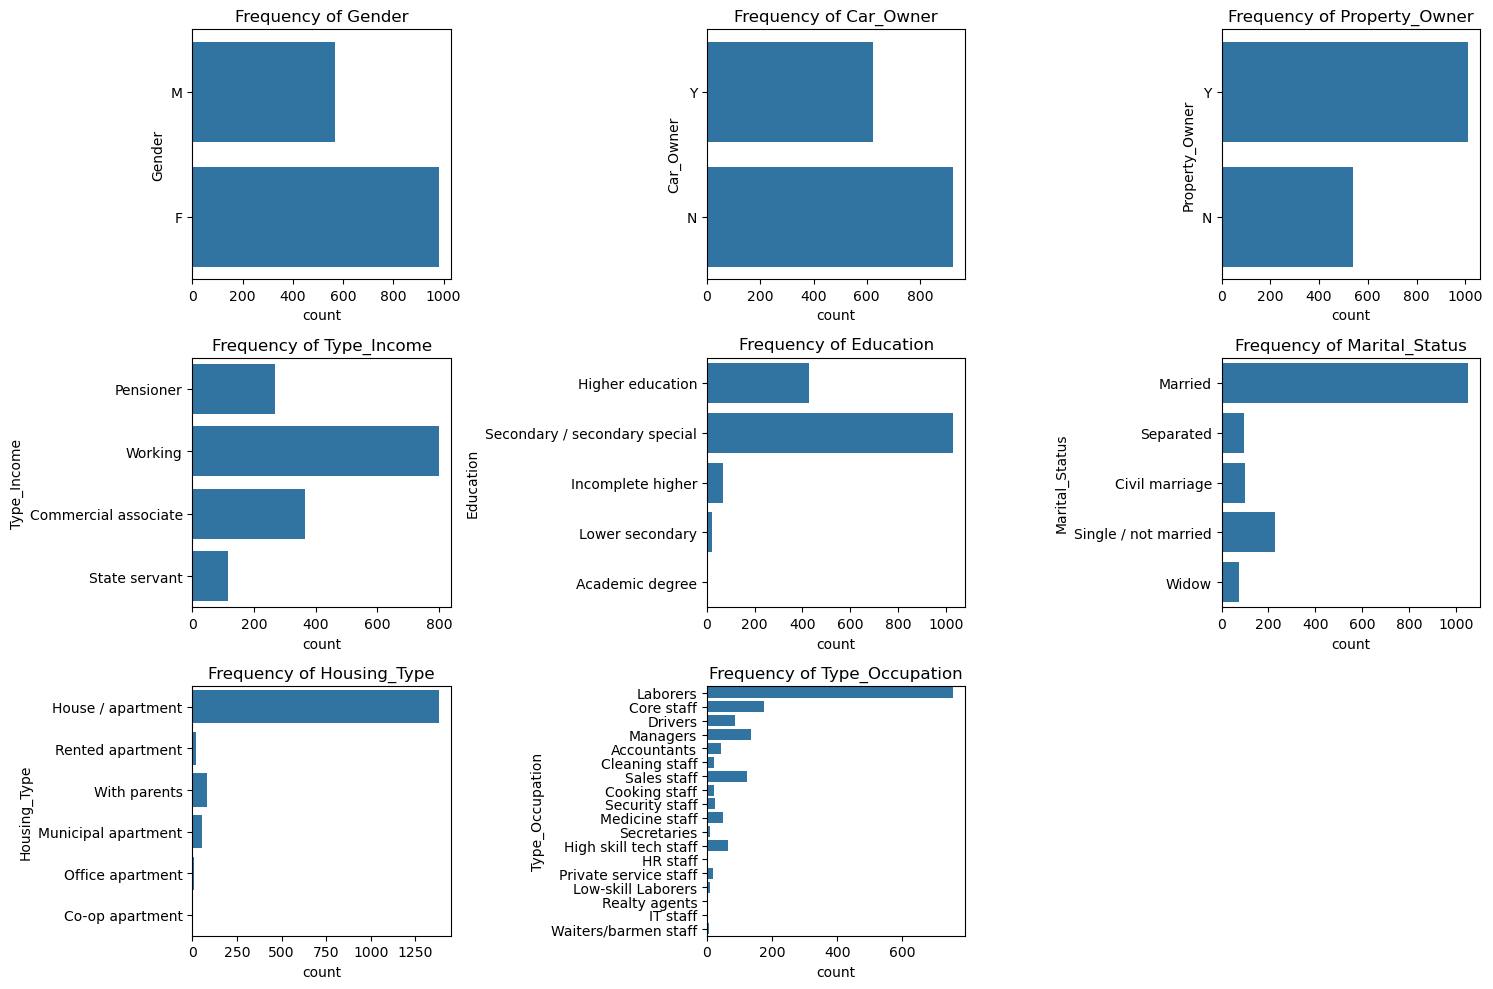

In [23]:
#Plot the Distribution of Categorical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(df[col])
    plt.title(f'Frequency of {col}')
plt.tight_layout()
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "categorical_variables.png")
plt.savefig(desktop_path)
plt.show()

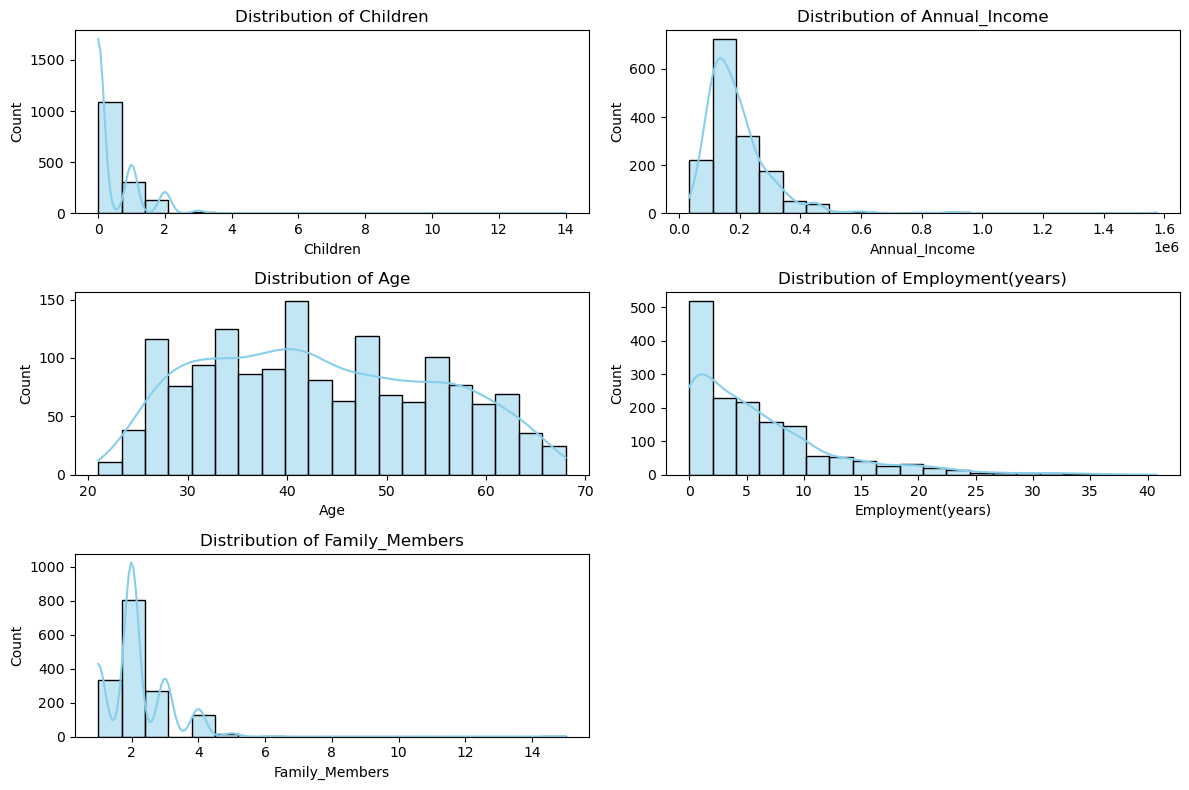

In [25]:
#Plot the Distribution of Numerical Features


plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Change from (2, 2) to (3, 2) for a 3x2 grid
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "numerical_variables.png")
plt.savefig(desktop_path)
plt.show()


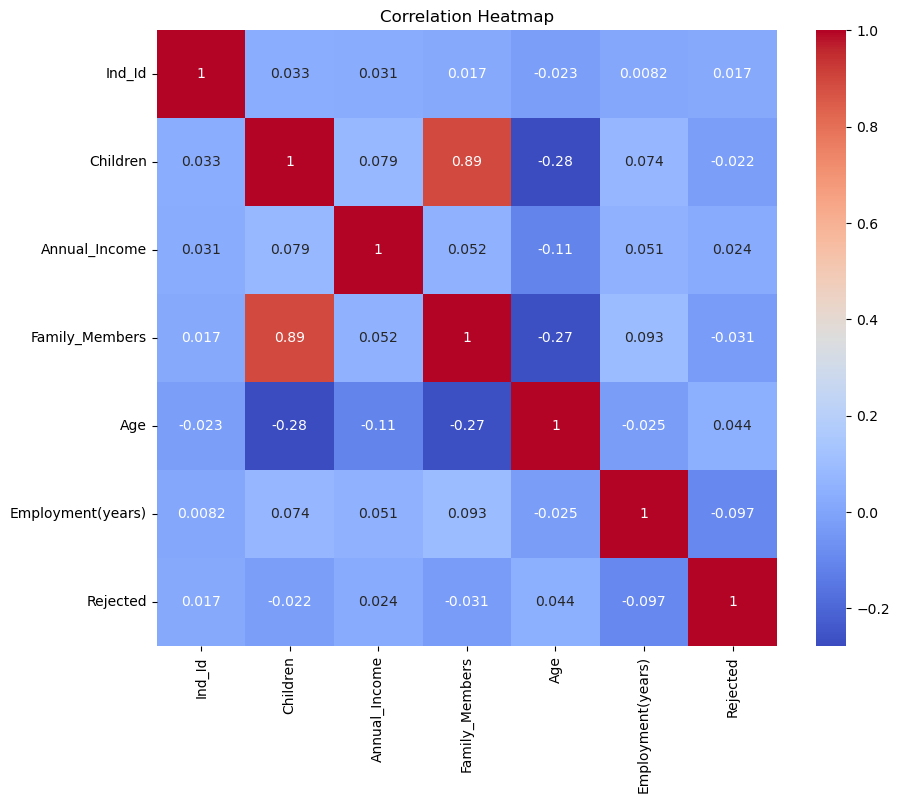

In [26]:
# Correlation heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "correlation.png")
plt.savefig(desktop_path)
plt.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

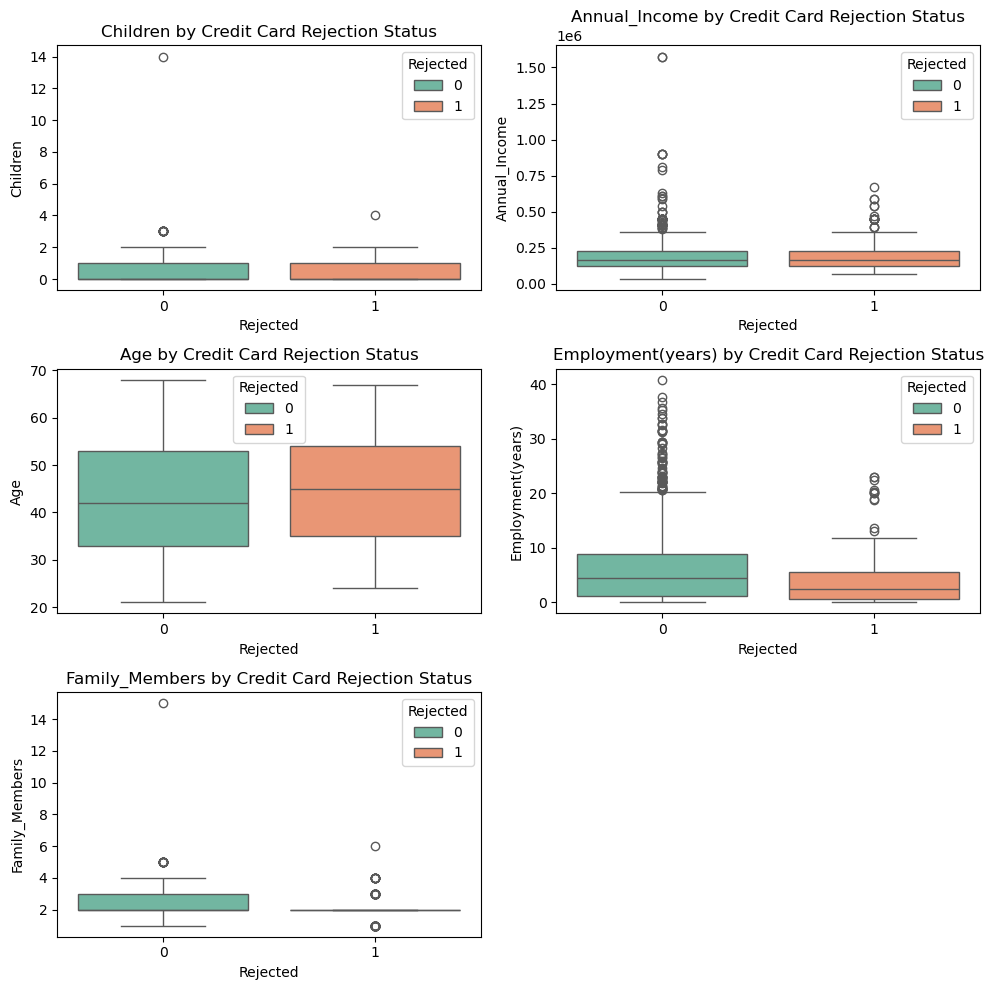

In [29]:

# Create boxplots for each numerical feature grouped by 'Rejected' status
for i, feature in enumerate(numerical_features, 1):
    plt.figure(figsize=(10, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Use a 3x2 grid for 6 slots (accommodates 5 features)
    sns.boxplot(x='Rejected', y=feature, data=df, palette="Set2", hue="Rejected")
    plt.title(f'{feature} by Credit Card Rejection Status', fontsize=12)
plt.tight_layout()
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "rejected.png")
plt.savefig(desktop_path)
plt.show()

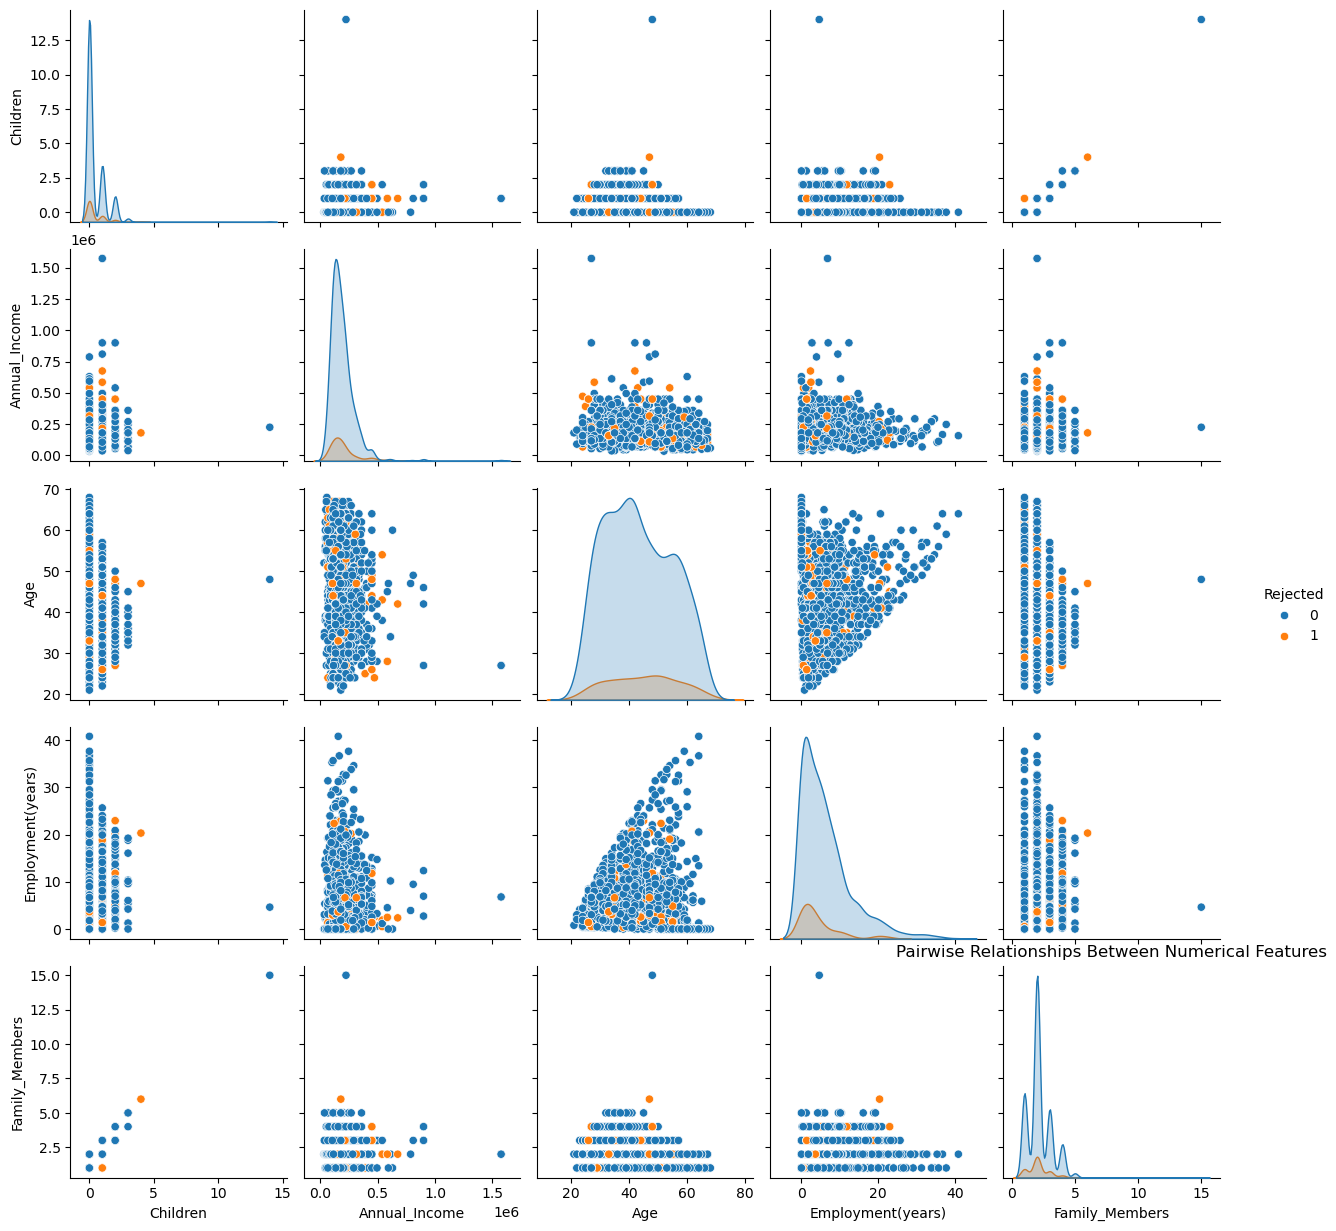

In [30]:
sns.pairplot(df, vars=numerical_features, hue='Rejected')
plt.title("Pairwise Relationships Between Numerical Features")
plt.show()


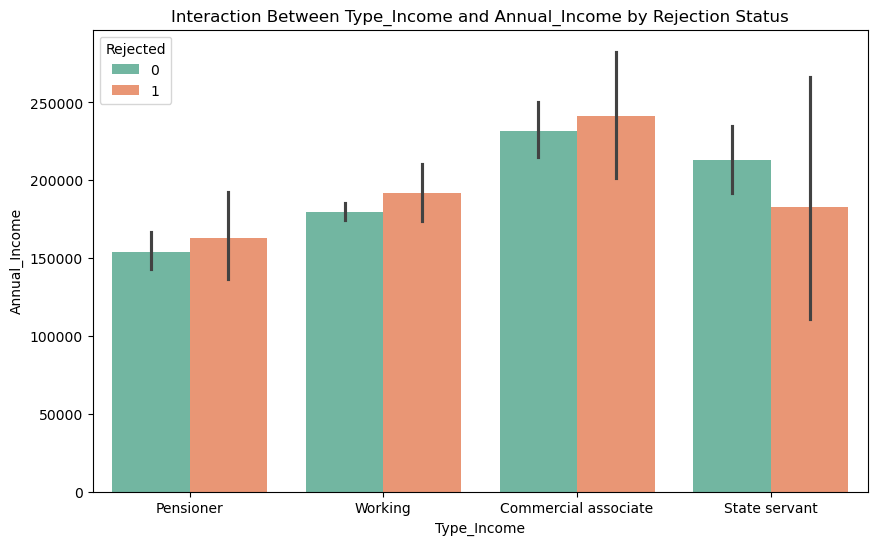

In [32]:
# Interaction Plot: Categorical x Numerical
plt.figure(figsize=(10, 6))
sns.barplot(x='Type_Income', y='Annual_Income', hue='Rejected', data=df, palette="Set2")
plt.title("Interaction Between Type_Income and Annual_Income by Rejection Status")
plt.show()


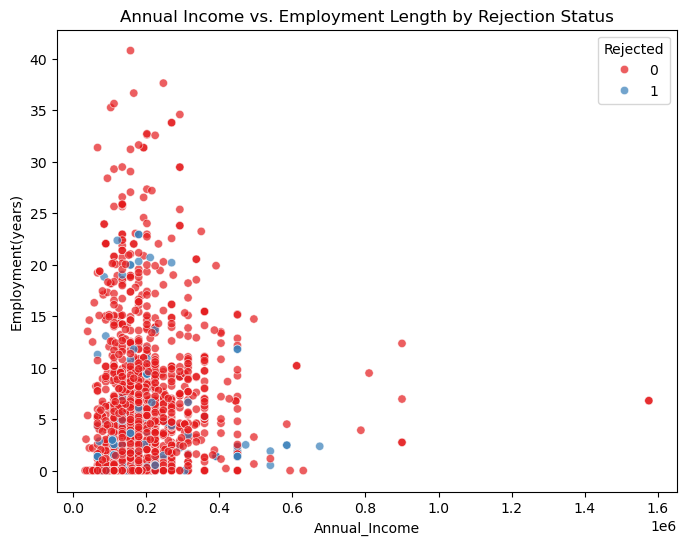

In [33]:
# Interaction Plot: Numerical x Numerical
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Employment(years)', hue='Rejected', data=df, palette="Set1", alpha=0.7)
plt.title("Annual Income vs. Employment Length by Rejection Status")
plt.show()


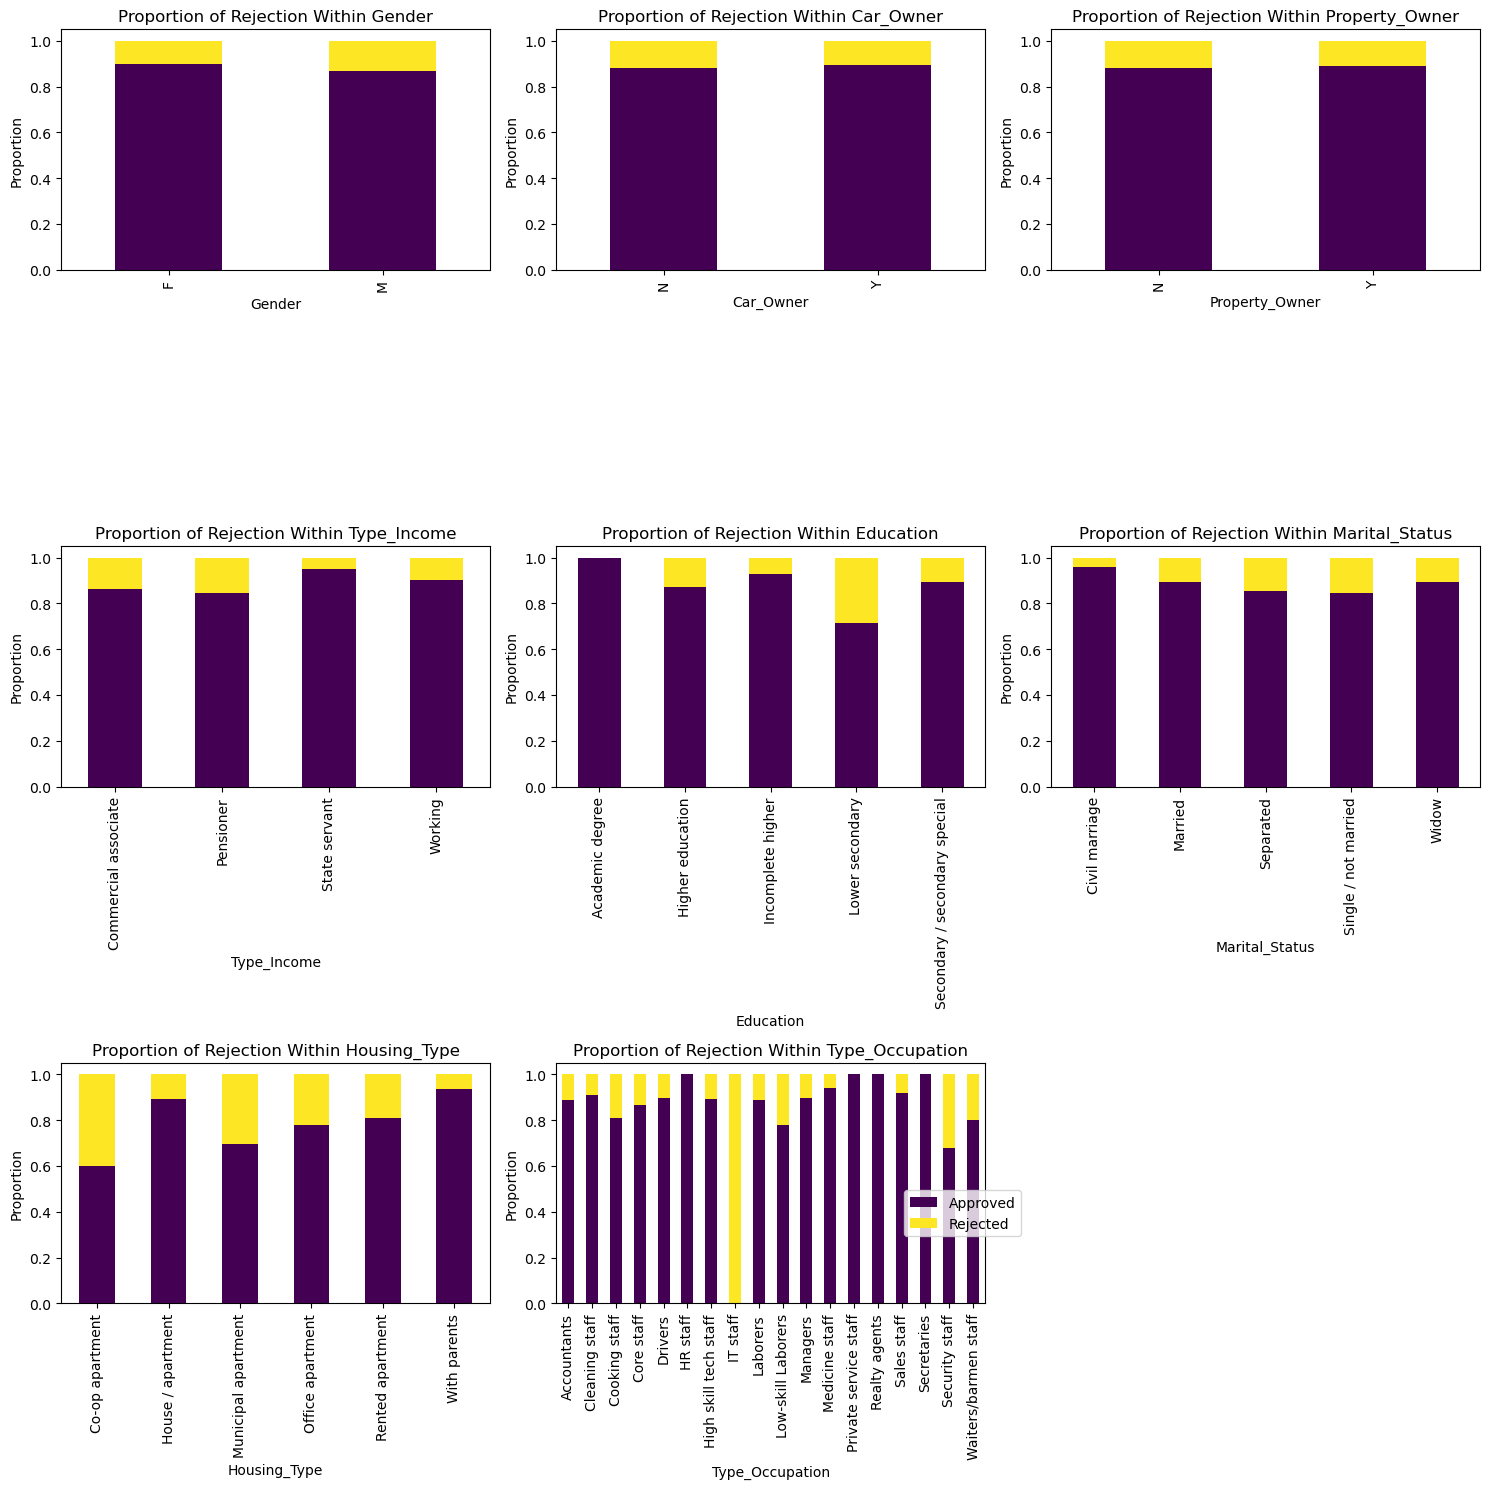

In [34]:

# Stacked Bar Chart for Categorical Variablesfor col in categorical_cols:

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    category_counts = pd.crosstab(df[col], df['Rejected'], normalize='index')
    category_counts.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis', legend=False)
    plt.title(f"Proportion of Rejection Within {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
plt.tight_layout()
plt.legend(["Approved", "Rejected"], loc='upper right', bbox_to_anchor=(1.1, 0.5))
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "prop.png")
plt.savefig(desktop_path)
plt.show()



In [35]:
# Map categorical features to numeric values
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['Car_Owner'] = df['Car_Owner'].map({'N': 0, 'Y': 1})
df['Property_Owner'] = df['Property_Owner'].map({'N': 0, 'Y': 1})
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df['Type_Income'] = df['Type_Income'].astype('category').cat.codes
df['Housing_Type'] = df['Housing_Type'].astype('category').cat.codes
df['Type_Occupation'] = df['Type_Occupation'].astype('category').cat.codes
df['Education'] = df['Education'].astype('category').cat.codes
df.head()
df.to_csv('credit_card_dataset.csv', index=False)
df.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Type_Occupation,Family_Members,Age,Employment(years),Rejected
0,5008827,0,1,1,0,180000.0,1,1,1,1,8,2,51,0.00,1
1,5008865,1,1,1,2,135000.0,3,4,1,1,8,4,43,8.69,0
2,5008889,1,0,1,0,247500.0,0,1,2,4,3,1,46,3.69,0
3,5009000,0,1,1,0,157500.0,3,4,1,1,4,2,27,2.27,0
4,5009023,1,0,1,2,216000.0,2,1,1,1,8,4,42,8.53,0


In [36]:
# Normalizing numerical features
numerical_features = ['Annual_Income', 'Age', 'Employment(years)', 'Family_Members']
for feature in numerical_features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df[feature] = (df[feature] - min_val) / (max_val - min_val)
    print(f"Normalized {feature}: Min={min_val}, Max={max_val}")

Normalized Annual_Income: Min=33750.0, Max=1575000.0
Normalized Age: Min=21, Max=68
Normalized Employment(years): Min=0.0, Max=40.79
Normalized Family_Members: Min=1, Max=15


In [37]:
# Select only numerical features (exclude non-numeric columns)
numerical_features = df.select_dtypes(include=[np.number]).columns
print("Step 1: Selected numerical features.")
print("Numerical features:", numerical_features)

Step 1: Selected numerical features.
Numerical features: Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Type_Occupation', 'Family_Members', 'Age',
       'Employment(years)', 'Rejected'],
      dtype='object')


In [39]:
# Features and target
X = df[numerical_features].drop(columns=['Ind_Id', 'Rejected']).values
y = df['Rejected'].values
print("Step 2: Features and target variables selected.")
print("X shape:", X.shape)
print("y shape:", y.shape)

Step 2: Features and target variables selected.
X shape: (1548, 13)
y shape: (1548,)


In [42]:
# Identify indices of each class
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]

# Undersample the majority class (0) to match the minority class size
undersample_indices = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# Oversample the minority class (1) to match the majority class size
oversample_indices = np.random.choice(class_1_indices, size=len(class_0_indices), replace=True)

# Combine the undersampled majority class and oversampled minority class
resampled_indices = np.concatenate([undersample_indices, oversample_indices])

# Shuffle the combined indices
np.random.shuffle(resampled_indices)

# Replace original X and y with resampled X and y
X = X[resampled_indices]
y = y[resampled_indices]

# Output the results
print("Resampled X shape:", X.shape)
print("Resampled y shape:", y.shape)


Resampled X shape: (1548, 13)
Resampled y shape: (1548,)


## 1.Logistic Regression:



Processing fold 1/4...
Iteration 1: Cost = 0.691599
Iteration 2: Cost = 0.690060
Iteration 3: Cost = 0.688528
Iteration 4: Cost = 0.687004
Iteration 5: Cost = 0.685488
Iteration 6: Cost = 0.683980
Iteration 7: Cost = 0.682479
Iteration 8: Cost = 0.680987
Iteration 9: Cost = 0.679502
Iteration 10: Cost = 0.678024
Iteration 11: Cost = 0.676555
Iteration 12: Cost = 0.675092
Iteration 13: Cost = 0.673638
Iteration 14: Cost = 0.672190
Iteration 15: Cost = 0.670751
Iteration 16: Cost = 0.669318
Iteration 17: Cost = 0.667893
Iteration 18: Cost = 0.666476
Iteration 19: Cost = 0.665065
Iteration 20: Cost = 0.663662
Iteration 21: Cost = 0.662266
Iteration 22: Cost = 0.660877
Iteration 23: Cost = 0.659496
Iteration 24: Cost = 0.658121
Iteration 25: Cost = 0.656754
Iteration 26: Cost = 0.655393
Iteration 27: Cost = 0.654039
Iteration 28: Cost = 0.652693
Iteration 29: Cost = 0.651353
Iteration 30: Cost = 0.650020
Iteration 31: Cost = 0.648694
Iteration 32: Cost = 0.647375
Iteration 33: Cost = 0.64

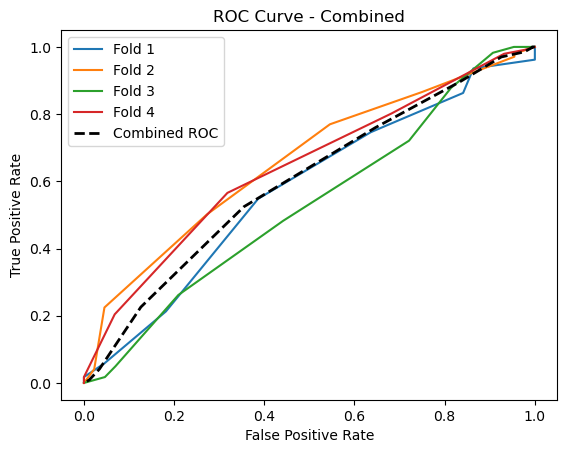


Final Results:
Average Training Accuracy: 0.8872
Average Testing Accuracy: 0.8870
Average Training F1 Score: 0.9402
Average Testing F1 Score: 0.9401


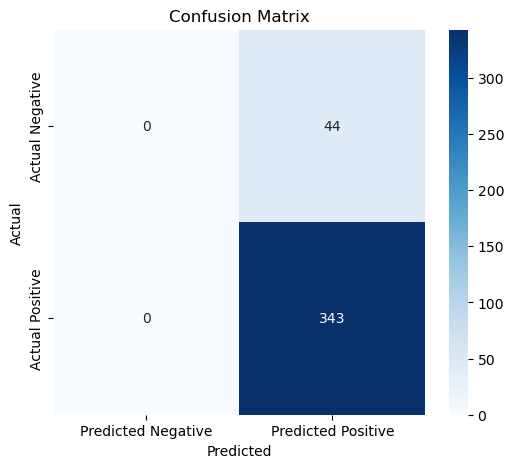

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Standardize features
def standardize(data_matrix):
    means = np.mean(data_matrix, axis=0)
    stds = np.std(data_matrix, axis=0) + 1e-8  # Avoid division by zero
    standardized_matrix = (data_matrix - means) / stds
    return standardized_matrix, means, stds

# 2. Stable sigmoid function
def stable_sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# 3. Binary logistic regression cost function
def binary_logistic_regression_cost_function(data_matrix, labels, weights):
    predictions = stable_sigmoid(np.dot(data_matrix, weights))
    cost = -np.mean(labels * np.log(predictions + 1e-8) + (1 - labels) * np.log(1 - predictions + 1e-8))
    return cost

# 4. Binary logistic regression gradient function
def binary_logistic_regression_gradient(data_matrix, labels, weights):
    predictions = stable_sigmoid(np.dot(data_matrix, weights))
    gradient = np.dot(data_matrix.T, (predictions - labels)) / len(labels)
    return gradient

# 5. Classification accuracy
def classification_accuracy(predictions, true_labels):
    correct = np.sum(predictions == true_labels)
    return correct / len(true_labels)

# 6. F1 Score calculation
def f1_score(predictions, true_labels):
    tp = np.sum((predictions == 1) & (true_labels == 1))
    fp = np.sum((predictions == 1) & (true_labels == 0))
    fn = np.sum((predictions == 0) & (true_labels == 1))
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    return 2 * (precision * recall) / (precision + recall + 1e-8)

# 7. Confusion matrix calculation
def confusion_matrix(true_labels, predictions):
    tp = np.sum((predictions == 1) & (true_labels == 1))
    tn = np.sum((predictions == 0) & (true_labels == 0))
    fp = np.sum((predictions == 1) & (true_labels == 0))
    fn = np.sum((predictions == 0) & (true_labels == 1))
    return np.array([[tn, fp], [fn, tp]])

# 8. Gradient descent for optimization
def gradient_descent(cost_function, gradient_function, initial_weights, data_matrix, labels, step_size=0.01, num_iterations=100):
    weights = np.copy(initial_weights)
    cost_history = []
    
    for i in range(num_iterations):
        grad = gradient_function(data_matrix, labels, weights)
        weights -= step_size * grad
        cost = cost_function(data_matrix, labels, weights)
        cost_history.append(cost)
        print(f"Iteration {i + 1}: Cost = {cost:.6f}")
        
    return weights, cost_history

# 9. Calculate TPR, FPR for ROC
def calculate_roc_metrics(true_labels, predicted_probs, thresholds):
    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        predicted_labels = (predicted_probs >= threshold).astype(int)
        tp = np.sum((predicted_labels == 1) & (true_labels == 1))
        fp = np.sum((predicted_labels == 1) & (true_labels == 0))
        fn = np.sum((predicted_labels == 0) & (true_labels == 1))
        tn = np.sum((predicted_labels == 0) & (true_labels == 0))

        tpr = tp / (tp + fn + 1e-8)
        fpr = fp / (fp + tn + 1e-8)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list)

# 10. K-Fold Cross-Validation with Logistic Regression and Combined ROC Curve
def kfold_logistic_with_combined_roc(
    X, y, K, cost_function, gradient_function, num_iterations=100, threshold=0.5
):
    fold_size = len(X) // K
    train_accuracies = []
    test_accuracies = []
    train_f1_scores = []
    test_f1_scores = []
    confusion_matrices = []
    all_cost_histories = []

    # Initialize lists to store FPR and TPR for each fold
    all_fprs = []
    all_tprs = []

    for k in range(K):
        print(f"\nProcessing fold {k + 1}/{K}...")

        # Split into training and testing
        test_indices = list(range(k * fold_size, (k + 1) * fold_size))
        train_indices = [i for i in range(len(X)) if i not in test_indices]

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Initialize weights
        initial_weights = np.zeros((X_train.shape[1], 1))

        # Train using gradient descent
        optimal_weights, cost_history = gradient_descent(
            cost_function, gradient_function, initial_weights, X_train, y_train, step_size=0.01, num_iterations=num_iterations
        )
        all_cost_histories.append(cost_history)

        # Training metrics
        train_probs = stable_sigmoid(np.dot(X_train, optimal_weights))
        train_preds = (train_probs >= threshold).astype(int)
        train_accuracy = classification_accuracy(train_preds, y_train)
        train_f1 = f1_score(train_preds, y_train)
        train_accuracies.append(train_accuracy)
        train_f1_scores.append(train_f1)

        # Testing metrics
        test_probs = stable_sigmoid(np.dot(X_test, optimal_weights))
        test_preds = (test_probs >= threshold).astype(int)
        test_accuracy = classification_accuracy(test_preds, y_test)
        test_f1 = f1_score(test_preds, y_test)
        test_accuracies.append(test_accuracy)
        test_f1_scores.append(test_f1)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, test_preds)
        confusion_matrices.append(conf_matrix)

        print(f"Training Accuracy for fold {k + 1}: {train_accuracy:.4f}")
        print(f"Testing Accuracy for fold {k + 1}: {test_accuracy:.4f}")
        print(f"Training F1 Score for fold {k + 1}: {train_f1:.4f}")
        print(f"Testing F1 Score for fold {k + 1}: {test_f1:.4f}")
        print(f"Confusion Matrix for fold {k + 1}:\n{conf_matrix}")

        # Calculate ROC for this fold
        thresholds = np.linspace(0, 1, 100)
        fpr, tpr = calculate_roc_metrics(y_test, test_probs, thresholds)
        all_fprs.append(fpr)
        all_tprs.append(tpr)

        # Plot ROC for the current fold
        plt.plot(fpr, tpr, label=f"Fold {k + 1}")

    # Calculate combined ROC by averaging over all folds
    combined_fpr = np.mean(all_fprs, axis=0)
    combined_tpr = np.mean(all_tprs, axis=0)

    # Plot combined ROC curve
    plt.plot(combined_fpr, combined_tpr, label="Combined ROC", color="black", linestyle="--", linewidth=2)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Combined")
    plt.legend()
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "log_roc.png")
    plt.savefig(desktop_path)
    plt.show()

    # Return results
    return (
        np.mean(train_accuracies),
        np.mean(test_accuracies),
        np.mean(train_f1_scores),
        np.mean(test_f1_scores),
        confusion_matrices,
        all_cost_histories,
    )


def plot_confusion_matrix(conf_matrix):
    df_cm = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "log_confusion.png")
    plt.savefig(desktop_path)
    plt.show()


if __name__ == "__main__":
    # Standardize the features
    X_standardized, means, stds = standardize(X)

    # Add intercept column
    X_with_intercept = np.hstack([np.ones((X_standardized.shape[0], 1)), X_standardized])

    # Reshape y if necessary
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    # Perform K-Fold Logistic Regression with Combined ROC
    K = 4
    avg_train_acc, avg_test_acc, avg_train_f1, avg_test_f1, confusion_matrices, cost_histories = kfold_logistic_with_combined_roc(
        X_with_intercept, y, K,
        cost_function=binary_logistic_regression_cost_function,
        gradient_function=binary_logistic_regression_gradient,
        num_iterations=100
    )

    print(f"\nFinal Results:")
    print(f"Average Training Accuracy: {avg_train_acc:.4f}")
    print(f"Average Testing Accuracy: {avg_test_acc:.4f}")
    print(f"Average Training F1 Score: {avg_train_f1:.4f}")
    print(f"Average Testing F1 Score: {avg_test_f1:.4f}")

    # Plot confusion matrix for the last fold
    plot_confusion_matrix(confusion_matrices[-1])


## 2. KNN

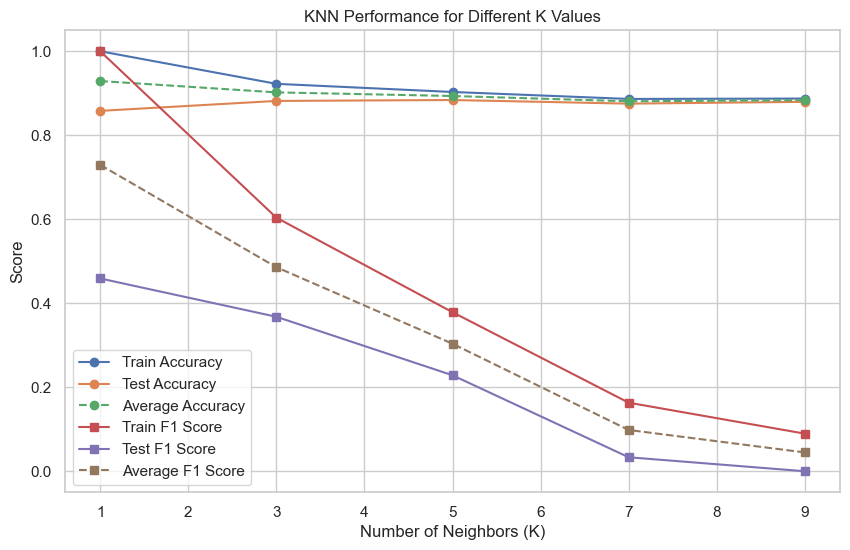

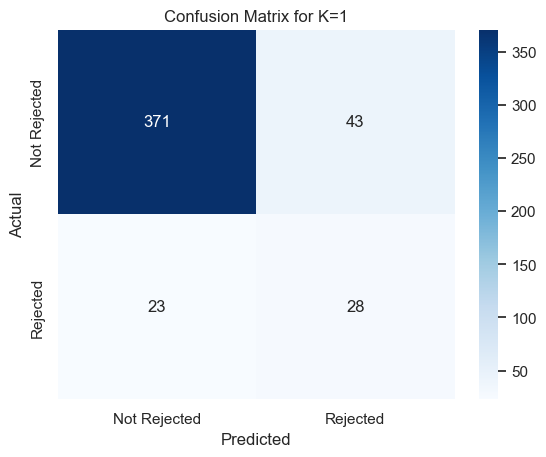

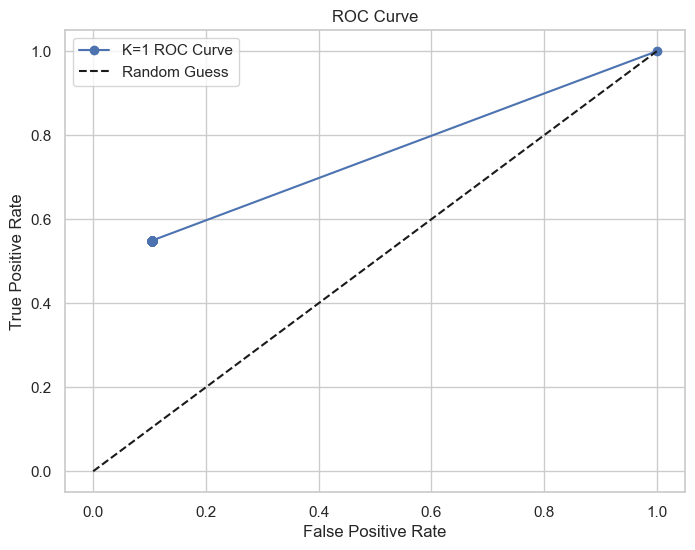

Best K: 1
Train Accuracy for Best K: 1.0000
Test Accuracy for Best K: 0.8581
Average Accuracy for Best K: 0.9290
Train F1 Score for Best K: 1.0000
Test F1 Score for Best K: 0.4590
Average F1 Score for Best K: 0.7295
Test ROC AUC for Best K: -0.6941


In [53]:

def pairwise_distances(from_data, to_data):
    """Calculate pairwise Euclidean distances."""
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2, axis=2))

def knn_model(testing_inputs, training_inputs, training_labels, k):
    """K-Nearest Neighbors model implementation."""
    distances = pairwise_distances(testing_inputs, training_inputs)
    sorted_indices = np.argsort(distances, axis=1)
    predicted_labels = np.zeros(testing_inputs.shape[0])

    for i in range(testing_inputs.shape[0]):
        closest_labels = training_labels[sorted_indices[i, :k]]
        predicted_labels[i] = np.bincount(closest_labels).argmax()

    return predicted_labels

def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return np.mean(y_pred == y_true)

def f1_score(y_pred, y_true):
    """Calculate F1 score."""
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def confusion_matrix(y_pred, y_true):
    """Calculate confusion matrix."""
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return np.array([[tn, fp], [fn, tp]])

def roc_auc(y_pred, y_true):
    """Calculate ROC AUC and return FPR, TPR, and AUC."""
    thresholds = np.linspace(0, 1, 101)
    fpr, tpr = [], []

    for threshold in thresholds:
        y_pred_bin = (y_pred >= threshold).astype(int)
        tp = np.sum((y_pred_bin == 1) & (y_true == 1))
        fp = np.sum((y_pred_bin == 1) & (y_true == 0))
        tn = np.sum((y_pred_bin == 0) & (y_true == 0))
        fn = np.sum((y_pred_bin == 0) & (y_true == 1))
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)

    auc = np.trapz(tpr, fpr)
    return auc, fpr, tpr

def plot_roc_curve(fpr, tpr, k):
    """Plot ROC curve."""
    sns.set(style='whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', label=f'K={k} ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "knn_roc.png")
    plt.savefig(desktop_path)
    plt.show()

def plot_confusion_matrix(cm, k):
    """Plot confusion matrix as a heatmap."""
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Rejected', 'Rejected'], 
                yticklabels=['Not Rejected', 'Rejected'])
    plt.title(f'Confusion Matrix for K={k}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "knn_conf.png")
    plt.savefig(desktop_path)
    plt.show()

# Load Dataset
df = pd.read_csv('credit_card_dataset.csv')  # Replace with the actual path
X = df.drop(columns=['Rejected']).values
y = df['Rejected'].values

# Split Dataset
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Evaluate KNN for Different k Values
k_values = [1, 3, 5, 7, 9]
train_accuracies, test_accuracies = [], []
train_f1_scores, test_f1_scores = [], []
confusion_matrices = {}

for k in k_values:
    y_train_pred = knn_model(X_train, X_train, y_train, k)
    y_test_pred = knn_model(X_test, X_train, y_train, k)

    train_accuracies.append(accuracy(y_train_pred, y_train))
    test_accuracies.append(accuracy(y_test_pred, y_test))

    train_f1_scores.append(f1_score(y_train_pred, y_train))
    test_f1_scores.append(f1_score(y_test_pred, y_test))

    confusion_matrices[k] = confusion_matrix(y_test_pred, y_test)

# Calculate Average Scores
average_accuracies = [(train + test) / 2 for train, test in zip(train_accuracies, test_accuracies)]
average_f1_scores = [(train + test) / 2 for train, test in zip(train_f1_scores, test_f1_scores)]

# Visualize Training, Testing, and Average Performance
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.plot(k_values, average_accuracies, label='Average Accuracy', marker='o', linestyle='--')
plt.plot(k_values, train_f1_scores, label='Train F1 Score', marker='s')
plt.plot(k_values, test_f1_scores, label='Test F1 Score', marker='s')
plt.plot(k_values, average_f1_scores, label='Average F1 Score', marker='s', linestyle='--')
plt.title('KNN Performance for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.legend()
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "knn_perf.png")
plt.savefig(desktop_path)
plt.show()

# Choose Best K and Evaluate Further
best_k = k_values[np.argmax(average_accuracies)]
y_test_pred_best = knn_model(X_test, X_train, y_train, best_k)
auc, fpr, tpr = roc_auc(y_test_pred_best, y_test)

# Plot Confusion Matrix for Best K
plot_confusion_matrix(confusion_matrices[best_k], best_k)

# Plot ROC Curve for Best K
plot_roc_curve(fpr, tpr, best_k)

# Print Best Model Metrics
print(f"Best K: {best_k}")
print(f"Train Accuracy for Best K: {train_accuracies[np.argmax(average_accuracies)]:.4f}")
print(f"Test Accuracy for Best K: {test_accuracies[np.argmax(average_accuracies)]:.4f}")
print(f"Average Accuracy for Best K: {average_accuracies[np.argmax(average_accuracies)]:.4f}")
print(f"Train F1 Score for Best K: {train_f1_scores[np.argmax(average_accuracies)]:.4f}")
print(f"Test F1 Score for Best K: {test_f1_scores[np.argmax(average_accuracies)]:.4f}")
print(f"Average F1 Score for Best K: {average_f1_scores[np.argmax(average_accuracies)]:.4f}")
print(f"Test ROC AUC for Best K: {auc:.4f}")


## SVM

Train Accuracy: 0.1145
Test Accuracy: 0.1097
Precision: 0.1097, Recall: 1.0000, F1 Score: 0.1977


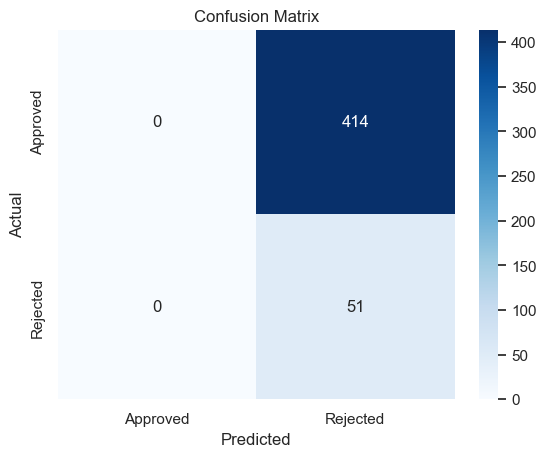

Test ROC-AUC: -0.4705


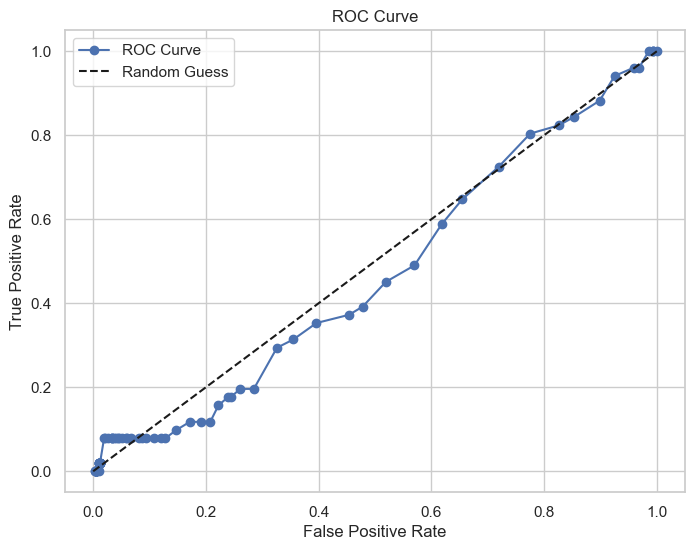

In [55]:


# Hinge Loss Function
def hinge_loss(X, y, w, b, C):
    """Calculate hinge loss."""
    n_samples = X.shape[0]
    margins = 1 - (2 * y - 1) * (np.dot(X, w) + b)  # Convert y from 0/1 to -1/1
    loss = np.sum(np.maximum(0, margins)) / n_samples
    regularization = 0.5 * np.dot(w, w)
    return C * loss + regularization

# SVM Training with Gradient Descent
def train_svm(X, y, C=1.0, learning_rate=0.001, max_iters=1000):
    """Train SVM using gradient descent."""
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias

    for _ in range(max_iters):
        margins = 1 - (2 * y - 1) * (np.dot(X, w) + b)  # Convert y from 0/1 to -1/1
        dw = w.copy()
        db = 0

        for i in range(n_samples):
            if margins[i] > 0:
                dw -= C * (2 * y[i] - 1) * X[i]
                db -= C * (2 * y[i] - 1)

        dw /= n_samples
        db /= n_samples

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

# SVM Prediction
def predict(X, w, b):
    """Predict using the SVM model."""
    scores = np.dot(X, w) + b
    return (scores >= 0).astype(int)  # Map to 0 or 1

# Performance Metrics
def accuracy(y_true, y_pred):
    """Calculate accuracy."""
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    """Generate confusion matrix."""
    tp = np.sum((y_pred == 1) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return np.array([[tn, fp], [fn, tp]])

def precision_recall_f1(y_true, y_pred):
    """Calculate precision, recall, and F1-score."""
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

def compute_roc_auc(y_scores, y_true):
    """Calculate ROC-AUC."""
    thresholds = np.linspace(min(y_scores), max(y_scores), 101)
    tpr, fpr = [], []

    for threshold in thresholds:
        y_pred_bin = (y_scores >= threshold).astype(int)
        tp = np.sum((y_pred_bin == 1) & (y_true == 1))
        fp = np.sum((y_pred_bin == 1) & (y_true == 0))
        tn = np.sum((y_pred_bin == 0) & (y_true == 0))
        fn = np.sum((y_pred_bin == 0) & (y_true == 1))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    auc = np.trapz(tpr, fpr)
    return auc, fpr, tpr

def plot_roc_curve(fpr, tpr):
    """Plot ROC curve."""
    plt.figure(figsize=(8, 6))
    sns.set(style='whitegrid')
    plt.plot(fpr, tpr, label="ROC Curve", marker='o')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "svm_roc.png")
    plt.savefig(desktop_path)
    plt.show()

# Train-Test Split
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Train SVM
C = 1.0
learning_rate = 0.01
max_iters = 1000
w, b = train_svm(X_train, y_train, C, learning_rate, max_iters)

# Evaluate Model
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

precision, recall, f1 = precision_recall_f1(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "svm_conf.png")
plt.savefig(desktop_path)
plt.show()

# ROC-AUC
y_test_scores = np.dot(X_test, w) + b  # Scores for ROC
auc, fpr, tpr = compute_roc_auc(y_test_scores, y_test)
print(f"Test ROC-AUC: {auc:.4f}")
plot_roc_curve(fpr, tpr)


In [56]:
##3. Decision Tree

Accuracy: 0.8806
F1 Score: 0.1778
ROC AUC: -0.5472


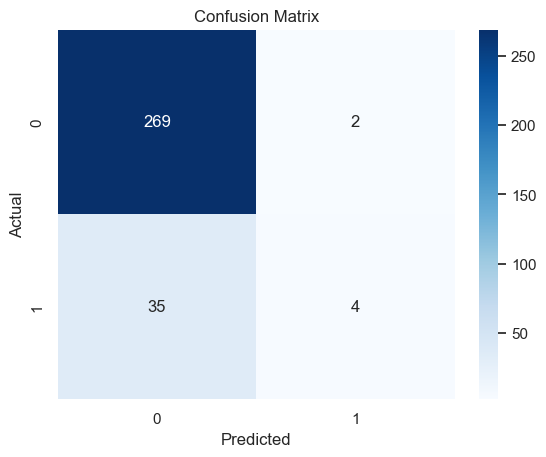

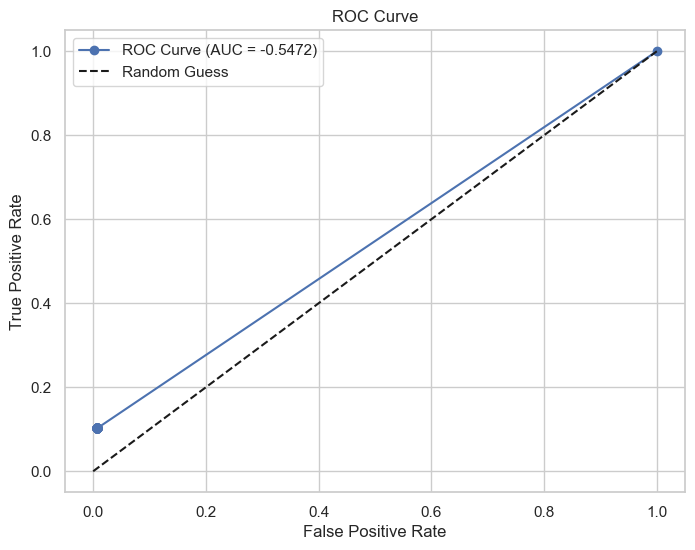

In [58]:

# Decision Tree Classifier
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()

        left_mask = X[:, best_feature] < best_threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gain, best_feature, best_threshold = -1, None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask
                gain = self._information_gain(y, left_mask, right_mask)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, y, left_mask, right_mask):
        def entropy(y):
            proportions = np.bincount(y) / len(y)
            return -np.sum([p * np.log2(p) for p in proportions if p > 0])

        parent_entropy = entropy(y)
        left_entropy = entropy(y[left_mask]) if len(y[left_mask]) > 0 else 0
        right_entropy = entropy(y[right_mask]) if len(y[right_mask]) > 0 else 0

        left_weight = len(y[left_mask]) / len(y)
        right_weight = len(y[right_mask]) / len(y)

        return parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if not isinstance(tree, tuple):
            return tree

        feature, threshold, left_subtree, right_subtree = tree
        if x[feature] < threshold:
            return self._predict_single(x, left_subtree)
        return self._predict_single(x, right_subtree)

# Evaluation Metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def roc_auc_score(y_true, y_scores):
    thresholds = np.linspace(min(y_scores), max(y_scores), 100)
    tpr, fpr = [], []

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)

        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    auc = np.trapz(tpr, fpr)
    return auc, fpr, tpr

# Train-Test Split
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))

    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Main Script
if __name__ == "__main__":
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train Decision Tree
    dt = DecisionTree(max_depth=5)
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Evaluation Metrics
    acc = accuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate scores for ROC-AUC
    y_scores = np.array([1 if pred == 1 else 0.5 for pred in y_pred])
    auc, fpr, tpr = roc_auc_score(y_test, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Visualization: Confusion Matrix
    conf_matrix = pd.crosstab(pd.Series(y_test, name="Actual"), pd.Series(y_pred, name="Predicted"))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "des_conf.png")
    plt.savefig(desktop_path)
    plt.show()

    # Visualization: ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})", marker="o")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "des_roc.png")
    plt.savefig(desktop_path)
    plt.show()